# Классификация ирисов 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
import random as rd
import requests
import io

In [2]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
raw_dataset = requests.get(data_url)
assert raw_dataset.status_code == 200

In [3]:
frame = pd.read_csv(io.StringIO(raw_dataset.text),header = None, quotechar=',', skipinitialspace=True)

In [4]:
dat_mat = np.zeros((150,4))
for i in range(4):
    dat_mat[:,i] = frame[i] 
dat_mat = dat_mat.T

In [5]:
dat_mat_train = np.zeros((4,75))
dat_mat_test = np.zeros((4,75))
for i in range(75):
    dat_mat_train[:,i] = dat_mat[:,i * 2]
    dat_mat_test[:,i] = dat_mat[:,1 + i * 2]


In [6]:
solution = np.zeros((3, 75))
solution[0,:25] = 1
solution[1,25:50] = 1
solution[2,50:75] = 1
#TODO: Сделать чуть более общим

In [7]:
NUM_INPUT = 4
NUM_HIDDEN = 11
NUM_OUTPUT = 3

In [8]:
def logreg(x):
    return 1./(1.+np.exp(-x))

In [9]:
def network(wghs, dat):
    dat = dat.reshape((4, 75))
    wgs_mat_size_1 = NUM_INPUT * NUM_HIDDEN
    wgs_mat_size_2 = NUM_HIDDEN * NUM_OUTPUT
    wgs_1 = wghs[:wgs_mat_size_1].reshape((NUM_HIDDEN, 4))
    wgs_2 = wghs[wgs_mat_size_1:wgs_mat_size_1 + wgs_mat_size_2].reshape((3, NUM_HIDDEN))
    z = logreg(np.dot(wgs_1, dat))
    z = logreg(np.dot(wgs_2, z))
    return z

In [10]:
def loss(wgs, data):
    z = network(wgs, data)
    _sum = 0
    for i in range(75):
        sq = np.linalg.norm(z[:,i] - solution[:,i])
        _sum += sq ** 2
    return _sum*(1./75.)    

In [193]:
wgs_size = (NUM_INPUT + NUM_OUTPUT) * NUM_HIDDEN
wgs_0 = np.random.sample(wgs_size)
while True:
    if optimize.minimize(loss, wgs_0, dat_mat_train).fun < 1 and optimize.minimize(loss, wgs_0, dat_mat_train).success:
        wgs_1 = optimize.minimize(loss, wgs_0, dat_mat_train).x
        # print(optimize.minimize(loss, wgs_0, dat_mat_train))
        break
print loss(wgs_1, dat_mat_train)
print loss(wgs_1, dat_mat_test)        

0.026666804755331622
0.0271012330671861


In [117]:
std_1 = []
std_2 = []

In [194]:
std_1.append(loss(wgs_1, dat_mat_train))
std_2.append(loss(wgs_1, dat_mat_test))

In [35]:
import matplotlib.pyplot as plt

## Построим график зависимости 

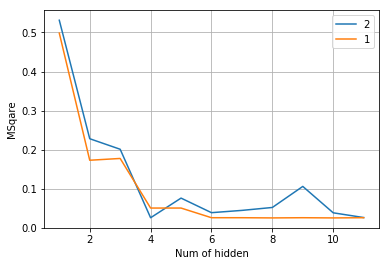

In [197]:
x = np.linspace(1,11,11)

plt.plot(x, std_2, label = '2')
plt.plot(x, std_1, label = '1')

plt.legend(loc='best')
plt.xlabel('Num of hidden neuros')
plt.ylabel('MSqare')
plt.grid()
plt.savefig('graph.pdf')

In [109]:
noise = np.random.normal(0,0.2,300).reshape(4, 75)
noised = dat_mat_test + noise

## Построим график зависимости ошибки от числа итераций (ещё с различными шумами)

In [111]:
# MSquare_deviations_test = []
# MSquare_deviations_test_noise_1 = []
# MSquare_deviations_test_noise_2 = []
# MSquare_deviations_test_noise_3 = []
# MSquare_deviations_test_noise_4 = []
# MSquare_deviations_test_noise_5 = []
# MSquare_deviations_test_noise_6 = []
MSquare_deviations_test_noise_7 = []
wgs_size = (NUM_INPUT + NUM_OUTPUT) * NUM_HIDDEN
wgs_0 = np.random.sample(wgs_size)
for i in range(50):
    param_dict = {'maxiter':5}
    res = optimize.minimize(loss, wgs_0, dat_mat_train, options = param_dict)
    MSquare_deviations_test_noise_7.append(loss(res.x, noised))
    wgs_0 = res.x
    print(i, loss(res.x, noised))
    

(0, 1.0970016638417774)
(1, 0.6807433229591069)
(2, 0.6662221383362853)
(3, 0.607422944890558)
(4, 0.47261517828784344)
(5, 0.3983870697131834)
(6, 0.3718110131704542)
(7, 0.36202835084569773)
(8, 0.35571670240707154)
(9, 0.3514369716754536)
(10, 0.3485465747789447)
(11, 0.346084760560503)
(12, 0.34451797500728987)
(13, 0.34311148384331874)
(14, 0.3418973869088448)
(15, 0.34021372933351707)
(16, 0.33901356807314315)
(17, 0.33751877753373327)
(18, 0.33198901817283333)
(19, 0.3415469484074212)
(20, 0.2877709344191906)
(21, 0.2602308186507635)
(22, 0.23999584047627873)
(23, 0.21548388602651364)
(24, 0.17680914200219564)
(25, 0.17916742246694536)
(26, 0.17678935217639122)
(27, 0.17979683217036152)
(28, 0.17807060246051123)
(29, 0.17913592635062903)
(30, 0.1814962093965763)
(31, 0.18497653070232126)
(32, 0.18371677912972684)
(33, 0.1832764529215023)
(34, 0.1864985846435732)
(35, 0.18679468471787997)
(36, 0.1873208947277861)
(37, 0.18961489735792636)
(38, 0.1914555068830541)
(39, 0.193801213

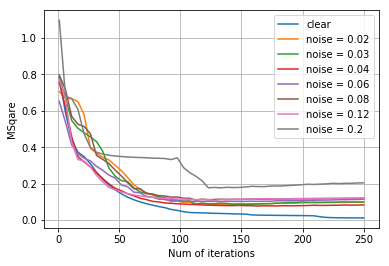

In [114]:
x = np.linspace(1,250,50)
plt.plot(x, MSquare_deviations_test, label = "clear")
plt.plot(x, MSquare_deviations_test_noise_1, label = "noise = 0.02")
plt.plot(x, MSquare_deviations_test_noise_2, label = "noise = 0.03")
plt.plot(x, MSquare_deviations_test_noise_3, label = "noise = 0.04")
plt.plot(x, MSquare_deviations_test_noise_4, label = "noise = 0.06")
plt.plot(x, MSquare_deviations_test_noise_5, label = "noise = 0.08")
plt.plot(x, MSquare_deviations_test_noise_6, label = "noise = 0.12")
plt.plot(x, MSquare_deviations_test_noise_7, label = "noise = 0.2")

plt.legend(loc='best')
plt.xlabel('Num of iterations')
plt.ylabel('MSqare')
plt.grid()
plt.savefig('graph_iter.png')